# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
print("size: ",len(df['temperature']))

size:  130


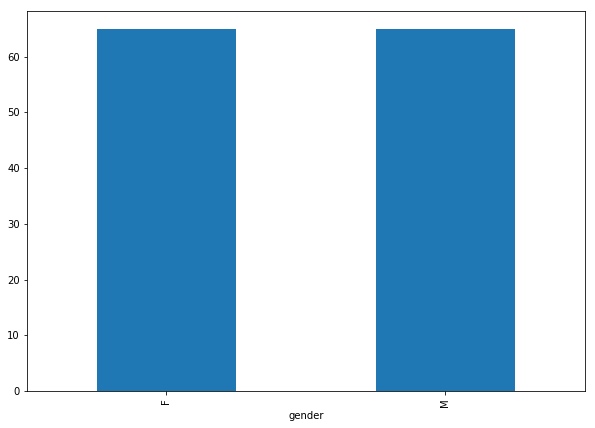

In [4]:
# barplot of male and female readings
plt.figure(figsize=(10, 7))
df.groupby('gender').count()['temperature'].plot(kind='bar')
plt.show()

## 1.  Is the distribution of body temperatures normal? ##

**1.1 Graphical Ways to test normality**

The mean and median of a normal distribution are equal. The density plot of the distribution is symmetric around the mean/median. The quantile-quantile plot of a normal distribution fits on a straight line.

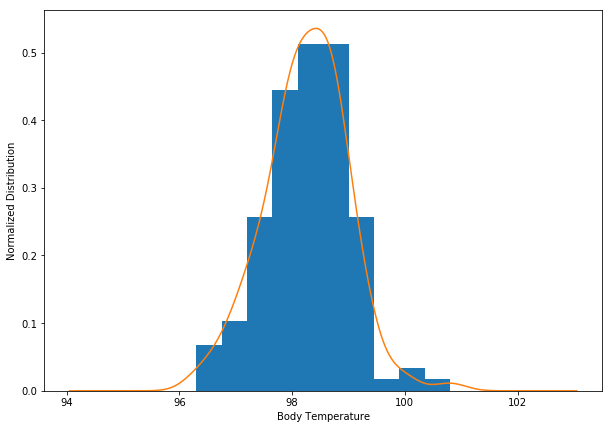

In [5]:
# the density plot and the histogram of the distribution of the body temperature
plt.figure(figsize=(10, 7))
df.temperature.hist(normed=True)
df.temperature.plot(kind = 'kde')
plt.xlabel('Body Temperature')
plt.ylabel('Normalized Distribution')
plt.show()

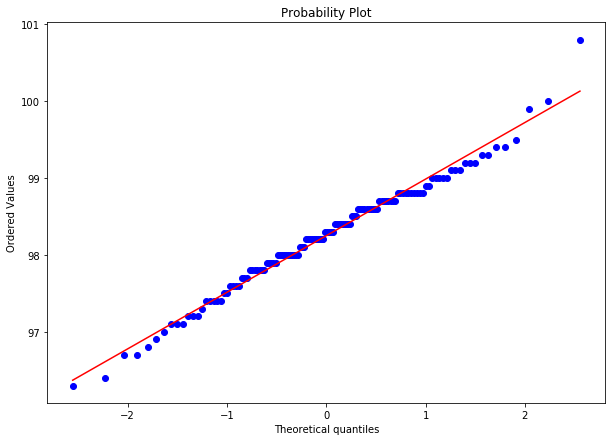

In [6]:
# Qunatile-quantile plot of distribution of the body temperatures
plt.figure(figsize=(10, 7))
stats.probplot(df['temperature'],plot=plt)
plt.show()

In [7]:
print('Mean of the distribution is: ',np.mean(df['temperature']),' and the Median is ',np.median(df['temperature']))

Mean of the distribution is:  98.2492307692  and the Median is  98.3


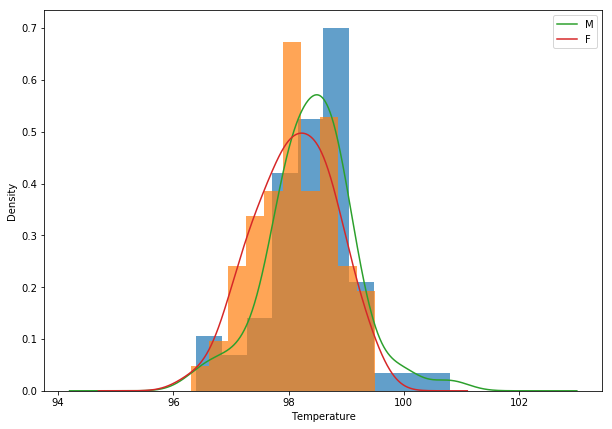

In [8]:
# the density plot and the histogram of the distribution of the body temperature for each gender
plt.figure(figsize=(10, 7))
df.groupby('gender')['temperature'].hist(normed='True', alpha =0.7)
df.groupby('gender')['temperature'].plot(kind='kde')
plt.legend(set(df.gender))
plt.xlabel('Temperature')
plt.show()

### 1.2 Observation: ###

1. The density plot of the distribution of temperature is about symmetrical around 98.3
2. The quantile-quantile plot of the distribution almost linear
3. The mean and the median of the distributions are equal
4. Distribution is approximately normal for each gender too 


**1.3 Statistical Tests of Normality**

***I. Shapiro Wilk Test***

The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data distribution is normal. This method was created by Samuel Shapiro and Martin Wilk.

In [9]:
stat, p = stats.shapiro(df['temperature'])
if(p > 0.05):
    print('Distribution of the body temperature is Normal')
else:
    print('Distribution of the body temperature is not Normal')        

Distribution of the body temperature is Normal


***II. D’Agostino’s K-squared Test***

The D’Agostino’s K-squared test calculates the kurtosis and skewness to determine if the data distribution departs from the normal distribution. This test was developed by Ralph D’Agostino.

In [10]:
skew, kurt = stats.normaltest(df['temperature'])
if(kurt > 0.005):
    print('Distribution of the body temperature is Normal')
else:
    print('Distribution of the body temperature is not Normal') 

Distribution of the body temperature is Normal


## 2. Is the sample size large? Are the observations independent? ##


**2.1 Sample Size Consideration**

In the classical central limit theorem one of the assumptions is that the sample size n has to be infintely large. In reality this a considerably large sample size is used to meet this requirement. For the practical purpose, we assume the sample size has to be greater than 30 to be considered large enough for the Central limit theorem.


In [11]:
# Check if the sample size, n is greater than 30
if len(df) > 30:
    print('Sample size is:', len(df),'(i.e. n>30); it is large enough for Central Limit Theorem')
else: 
    print('Sample size is not large enough for Central Limit Theorem')

Sample size is: 130 (i.e. n>30); it is large enough for Central Limit Theorem


**2.2 Are The observations independant?**

The original data are collected from the 148 individuals at different time. The body temperatures varies randomly. Sometimes it may be high and sometimes it may be low. A person with higher body temperature can undoubtedly gain more temperature. It is unpredictable base.Since human body temperature at any time does not affect teperature at a different time, the observations are thus independent of each other.

## 3. Is the true population mean really 98.6 degrees F? ##

**3.1 Bootstrap Hypothesis Test**

Since the distribution to achieve the mean body temperature of 98.6 is unknown, we will shift the distribution of observed body temperature to match the mean of 98.6. Hence, overall shape of the shifted distribution will remain same as the original distribution. 

Steps for the Hypothesis Testing:

Step 1: Set up the Hypotheses:
- Null Hypothesis(H0): true mean = 98.6
- Alternative Hypothesis(Ha): true mean is not 98.6

Step 2: Set significance level = 0.05

Step 4: Draw bootstrap means from the shifted distribution

Step 3: Set test statistics, p = probability of bootstrap mean is equal or less than the sample mean

step 4: compare p >= 0.05



In [12]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


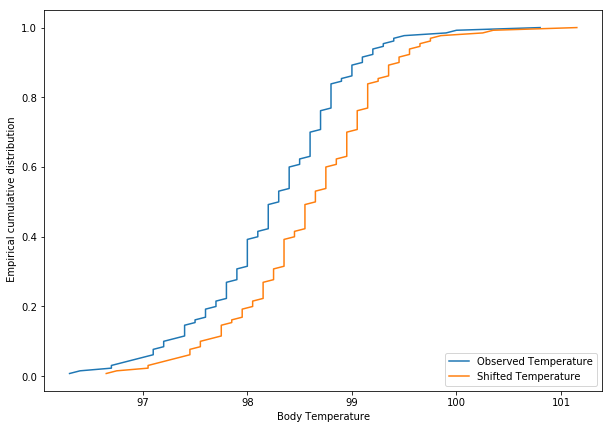

In [13]:
# shift the distribution of temperature to match the mean 98.6
shifted_temperature = df.temperature - np.mean(df.temperature) + 98.6

# CDF of the distributions
x, y = ecdf(df.temperature)
x_shifted, y_shifted = ecdf(shifted_temperature)

# plot of the two distribution to compare the shape of overall distribution
plt.figure(figsize=(10, 7))
plt.plot(x, y)
plt.plot(x_shifted, y_shifted)
plt.xlabel('Body Temperature')
plt.ylabel(' Empirical cumulative distribution')
plt.legend(('Observed Temperature', 'Shifted Temperature'), loc='lower right')
plt.show()

In [14]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))
    return bs_replicates


In [15]:
# mean of the original distribution
df_temperature_mean = np.mean(df.temperature)

# boostrapped means of randomly drawn samples
bs_temperature_mean = draw_bs_reps(shifted_temperature, np.mean, 10000)

# test statistics p
p = np.sum(bs_temperature_mean<=df_temperature_mean)/len(bs_temperature_mean)

# print the 95% confidence level
print("Test Statistics p = ", p)
print("Since the p = {} < 0.05, H0 is rejected. Therefore, the true mean is not 98.6".format(p))

Test Statistics p =  0.0
Since the p = 0.0 < 0.05, H0 is rejected. Therefore, the true mean is not 98.6


**3.2 Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?**

A distribution is required to fulfill three major conditions for statistical inference
- Noramlity: 
    Distribution need to be normal or approximately normal. The provided data-set meet this requirement. Even gender-wise distributions also meet the requirement. 
- Random: 
    Individual Observation has to be collected randomly. Original data is collected at a random. Although the provided data sampled selectively, but it resembles the original histogram and distribution. Therefore, we can assume the provided dataset meet this condition too.
    
- Independent
    The observations have to  be independent. The provided dataset does meet this condition.
    
    
**3.3 In this situation, is it appropriate to use the  t  or  z  statistic?**

Since The true standard deviation is not known, one sample t statistics would be more appropriate. However, the sample size is large. Z-test would also produce pretty accurate result.

In [16]:
# import the models for dependent t-test 
from scipy.stats import ttest_1samp
from statsmodels.stats.weightstats import ztest

**3.4 t-test for one samples**

- H0 : mean of the randomly picked temperature samples = 98.6
- Ha : mena of the randomly picked temperature samples is not 98.6
- In this situation, Type I error--Considering People with 98.6F temperature have abonarmality or disease, when they are not sick, and Type II error--Considering people with 98.6F temperatutre is not sick, when they are truly sick. Hence Type II is more dangerous than Type I scenario. The sigficance level alpha = 0.05 , in stead of somewhat lower like 0.1

In [17]:
# calculate p value from the dependent t statistics
p_ttest = ttest_1samp(df.temperature, 98.6 )[1]

print("p value from t-test is {}".format(p_ttest))
if(p_ttest <0.05):
    print("Since p value is smaller than the significance level 0.05, the null hypothesis is rejected. True Normal body temperature is not 98.6.")
else:
    print("Since p value is greater than the significance level 0.05, the null hypothesis is not rejected. True normal temperature is  98.6.")

p value from t-test is 2.4106320415561276e-07
Since p value is smaller than the significance level 0.05, the null hypothesis is rejected. True Normal body temperature is not 98.6.


**3.5 Now try using the other test.**

**Z-test for one sample**

In [18]:
# calculate p value from the z-statistics
p_ztest = ztest(x1=df.temperature, value=98.6)[1]

# compare the p value with the significance level
print("p value from the z-test is {}".format(p_ztest))
if(p_ztest <0.05):
    print("Since p value is smaller than the significance level 0.05, the null hypothesis is rejected. True Normal body temperature is not 98.6.")
else:
    print("Since p value is greater than the significance level 0.05, the null hypothesis is not rejected. True normal temperature is  98.6.")
        

p value from the z-test is 4.9021570141012155e-08
Since p value is smaller than the significance level 0.05, the null hypothesis is rejected. True Normal body temperature is not 98.6.


**3.6 How is the result be different? Why?**

Both the t-test and the z-test reject the null hypothesis and proves that the normal body temperature is not 98.6 F. ALthough the p values for the tests are not the same, the difference is very small; close to 0. Since the sample size is large (n >30), both test shows approximately same result. 

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. ##


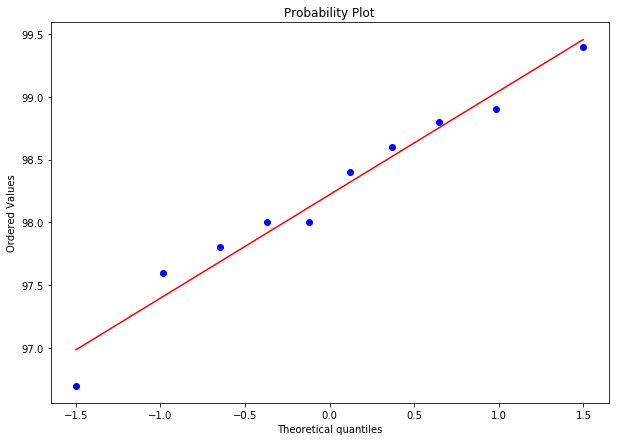



From the Q-Q plot it's clear that the small sample is normally distributed.


In [19]:
# draw a small sample of size 10 from the data
np.random.seed(42)
temperature_dist_10 = np.random.choice(df.temperature, size=10, replace=False)

# plot the Q-Q plot of the distribution 
plt.figure(figsize=(10, 7))
stats.probplot(temperature_dist_10, plot=plt)
plt.show()

print("\n\nFrom the Q-Q plot it's clear that the small sample is normally distributed." )

**i. t-test on the small sample**

In [20]:
# calculate p value from the dependent t statistics
p_ttest_small = ttest_1samp(temperature_dist_10, 98.6 )[1]

print("p value from t-test is {}".format(p_ttest_small))
if(p_ttest_small <0.05):
    print("Since p value is smaller than the significance level 0.05, the null hypothesis is rejected. True Normal body temperature is not 98.6.")
else:
    print("Since p value is greater than the significance level 0.05, the null hypothesis is not rejected. True normal temperature is  98.6.")
  

p value from t-test is 0.15304624869561917
Since p value is greater than the significance level 0.05, the null hypothesis is not rejected. True normal temperature is  98.6.


**ii. z-test on the small sample**

In [21]:
# calculate p value from the z-statistics
p_ztest_small = ztest(x1=temperature_dist_10, value=98.6)[1]

# compare the p value with the significance level
print("p value from the z-test is {}".format(p_ztest_small))
if(p_ztest_small <0.05):
    print("Since p value is smaller than the significance level 0.05, the null hypothesis is rejected. True Normal body temperature is not 98.6.")
else:
    print("Since p value is greater than the significance level 0.05, the null hypothesis is not rejected. True normal temperature is  98.6.")
    

p value from the z-test is 0.11861362990253162
Since p value is greater than the significance level 0.05, the null hypothesis is not rejected. True normal temperature is  98.6.


**4.1. Which one is the correct one to use?**

In case of smaller (n <30) sample like this one, t-test is more correct to use.

**4.2. What do you notice?**

From the frequintists tests on samples of different sizes, a few changes are noticable:
- These tests vary drastically with the sample size. 
- With smaller sample these tests may produce inaccurate results


**4.3.  What does this tell you about the difference in application of the  t  and  z  statistic?**

It is also noticable that with large sample size and unknown standard deviation, z-test and t-test results almost same p value. However, for a smaller sample, there is significant difference between the p-values of these two tests. For instance, when the sample size was 130 this difference was approximately to 0, but for a small sample size of 10, the difference is about 0.03.  

## 5. At what temperature should we consider someone's temperature to be "abnormal"?
- As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
- Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.


**i. Bootstrap method**

In [22]:
# Draw 10000 random sample of size 130 and calculate their mean.
bootstrap_mean_distribution = draw_bs_reps(data=df.temperature, func=np.mean, size=10000)

# find the 95% confidence interval of the distribution of the boostrap mean
bs_confidence_interval = np.percentile(bootstrap_mean_distribution, [2.5, 97.5])

print("Anyone with body temperature outside the range of {} will be considered 'abnormal' ".format(bs_confidence_interval))

Anyone with body temperature outside the range of [ 98.12307692  98.37461538] will be considered 'abnormal' 


**ii. Frequintist Method (T-table)**

In [23]:
# Assuming the the dataset represent the true population data 
critical_value = stats.t.ppf(q = 0.975, df=len(df.temperature)-1)
std_error = df.temperature.std()/np.sqrt(len(df.temperature))
margin_of_error = critical_value*std_error
confidence_interval = stats.t.interval(alpha=0.95, df=len(df.temperature)-1, loc=df.temperature.mean(), scale= std_error)


print("Margin of error: {}".format(margin_of_error))
print("Anyone with body temperature outside the range of {} will be considered 'abnormal'.".format(confidence_interval))

Margin of error: 0.1272278636227305
Anyone with body temperature outside the range of (98.122002905608014, 98.376458632853485) will be considered 'abnormal'.


## 6. Is there a significant difference between males and females in normal temperature?


**Hypothesis Testing** 

Null Hypothesis, H0: Normal temperature of male -  Normal temperature of Female = 0 

Alternate Hypothesis Ha : The temperature difference of male and female is not 0. There is a significant difference in the 
normal temperature

Sigficance level: alpha = 0.05

In [24]:
# Temperature distributions of males and females 
temperature_dist_male = df.temperature[df.gender=='M']
temperature_dist_female = df.temperature[df.gender == 'F']

# mean temperatures of male and female
print("Average temperature among Males :", temperature_dist_male.mean() )
print("Average temperature among Females :", temperature_dist_female.mean())
print("\n")


# find the p-value 
p_value_diff = stats.ttest_ind(a=temperature_dist_male, b=temperature_dist_female)[1]

# compare the p value to prove or reject the hypothesis
if(p_value_diff <0.05):
    print("Since p value is smaller than the significance level 0.05, the null hypothesis is rejected. There is a significant difference between males and females in normal temperature.\n")
else:
    print("Since p value is greater than the significance level 0.05, the null hypothesis is not rejected. There is no difference in male and female in normal temperature.\n ")
    

Average temperature among Males : 98.1046153846
Average temperature among Females : 98.3938461538


Since p value is smaller than the significance level 0.05, the null hypothesis is rejected. There is a significant difference between males and females in normal temperature.



**6.1. What testing approach did you use and why?**

We used a two sample t-testing. The distributions for male and female meets the condisions of frequintist inferencial statistics. However, the true population standard deviation is unknown. Although z-test would also show the same result, independent two sample t-test would perform better in case of unknown standard deviation. 



## Write a story with your conclusion in the context of the original problem. ##

It is commonly known that regardless of gender, normal body temperature of 98.6 F. However, in reality sickness cannot be determined with this ideal number. From the data analysis we have seen that the temperature of a group of healthy people varies between 98.1 to 98.4, even though they are not sick. After recording their temperature at different time, it was found that their average normal temperature hardly ever reaches 98.6 F. This result, however, differs with the gender. Surprisingly, unlike the usual assumption, male and female do have different normal body temperature, and for females it is slightly higher than that of males. In conclusion, if the body temperature crosses the range of 98.1F to 98.4F, it is a sign of sickness; and the best option in this case is to consult a doctor. 
